In [1]:
import plumed
import matplotlib.pyplot as plt
import os
import subprocess

In [2]:
import MDAnalysis

In [3]:
import numpy as np
import math

In [4]:
ls

001/  069/                       fes_139.dat  fes_62.dat
002/  070/                       fes_13.dat   fes_63.dat
003/  071/                       fes_140.dat  fes_64.dat
004/  072/                       fes_141.dat  fes_65.dat
005/  073/                       fes_142.dat  fes_66.dat
006/  074/                       fes_143.dat  fes_67.dat
007/  075/                       fes_144.dat  fes_68.dat
008/  076/                       fes_145.dat  fes_69.dat
009/  077/                       fes_146.dat  fes_6.dat
010/  078/                       fes_147.dat  fes_70.dat
011/  079/                       fes_148.dat  fes_71.dat
012/  080/                       fes_149.dat  fes_72.dat
013/  081/                       fes_14.dat   fes_73.dat
014/  082/                       fes_150.dat  fes_74.dat
015/  083/                       fes_151.dat  fes_75.dat
016/  084/                       fes_152.dat  fes_76.dat
017/  085/                       fes_15.dat   fes_77.dat
018/  086/                      

In [12]:
miadir=os.getcwd()

In [13]:
print (miadir)

/hdnas/marcol/tau/polimeri-120/monomer/meta/select-new


In [14]:
%%bash
pwd

/hdnas/marcol/tau/polimeri-120/monomer/meta/select-new


In [15]:
!pwd

/hdnas/marcol/tau/polimeri-120/monomer/meta/select-new


In [16]:
%%bash
plumed sum_hills --hills HILLS --stride 20000 --mintozero

PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Jun 18 2023 at 17:13:44
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /opt/plumed-2.9.0/lib/plumed
PLUMED: For installed feature, see /opt/plumed-2.9.0/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite where appropriate!
PLUMED: Finished setup
PLUMED: Action FAKE
PLUMED:   with label

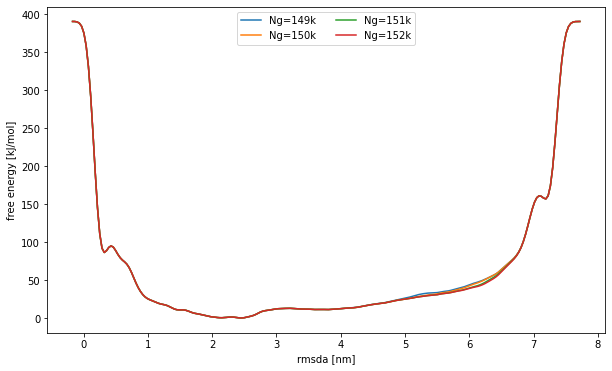

In [5]:
plt.figure(figsize=(10,6))
for i in range(149,153,1):

    data=plumed.read_as_pandas("fes_"+str(i)+".dat")
    plt.plot(data["rmsda"],data["file.free"], label="Ng="+str(int(i/1))+"k")

plt.xlabel("rmsda [nm]")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=2)

In [19]:
data_hills=plumed.read_as_pandas("HILLS")


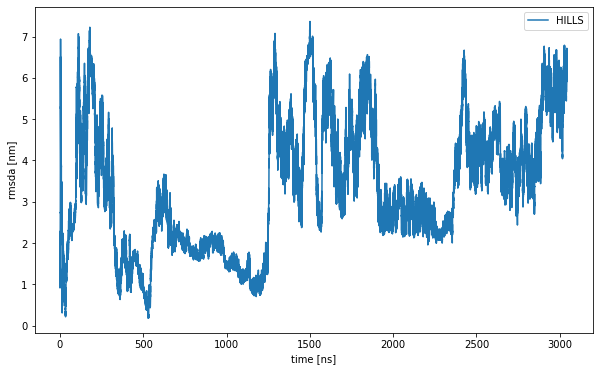

In [20]:
plt.figure(figsize=(10,6))
plt.xlabel("time [ns]")
plt.ylabel("rmsda [nm]")
plt.plot(data_hills["time"]/1000.0,data_hills["rmsda"],label="HILLS")
plt.legend()

In [31]:
%%bash
cat > "plumed_rew.dat" << EOF
rmsda: RMSD REFERENCE=prot_ref_a.pdb TYPE=OPTIMAL

metad: METAD ARG=rmsda ...
PACE=10000000 HEIGHT=0.0 SIGMA=0.1 FILE=HILLS GRID_MIN=0.0 GRID_MAX=10.0 BIASFACTOR=16.0 TEMP=310.0
RESTART=YES # <- this is the new stuff!
...

# Use the metadynamics bias as argument
as: REWEIGHT_BIAS ARG=metad.bias
# Calculate histograms of phi and psi dihedrals every 50 steps
# using the weights obtained from the metadynamics bias potentials (umbrella-sampling-like reweighting)
# Look at the manual to understand the parameters of the HISTOGRAM action!
hhrmsda: HISTOGRAM ARG=rmsda STRIDE=1 GRID_MIN=0.0 GRID_MAX=10.0 GRID_BIN=100 BANDWIDTH=0.1 LOGWEIGHTS=as
# Convert histograms h(s) to free energies F(s) = -kBT * log(h(s))
ffrmsda: CONVERT_TO_FES GRID=hhrmsda
# Print out the free energies F(s) to file once the entire trajectory is processed
DUMPGRID GRID=ffrmsda FILE=ffrmsda_reweighted.dat

PRINT ARG=rmsda,metad.bias FILE=COLVAR_reweighted STRIDE=1 # <- also change this one!
EOF

In [32]:
'''
plumed driver --ixtc traj_comp_align.xtc --plumed plumed_rew.dat --kt 2.57748341158 --timestep 10.0
'''

'\nplumed driver --ixtc traj_comp_align.xtc --plumed plumed_rew.dat --kt 2.57748341158 --timestep 10.0\n'

In [33]:
%%bash
plumed driver --ixtc traj_comp_align.xtc --plumed plumed_rew.dat --kt 2.57748341158 --timestep 10.0

PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Jun 18 2023 at 17:13:44
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /opt/plumed-2.9.0/lib/plumed
PLUMED: For installed feature, see /opt/plumed-2.9.0/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1197
PLUMED: File suffix: 
PLUMED: FILE: plumed_rew.dat
PLUMED: Action RMSD
PLUMED:   with label rmsda
PLUMED:   reference from file prot_ref_a.pdb
PLUMED:   which contains 307 atoms
PLUMED:   with indices : 
PLUMED: 1 5 8 9 10 12 19 20 21 23 35 36 37 39 52 53 54 56 71 72 73 75 87 88 89 
PLUMED: 91 108 109 110 112 130 131 132 136 144 145 146 148 160 161 162 164 172 173 174 176 191 192 193 195 
PLUMED: 202 203 204 206 224 225 226 228 240 241 242

In [34]:
data_colvar_rew=plumed.read_as_pandas("COLVAR_reweighted")

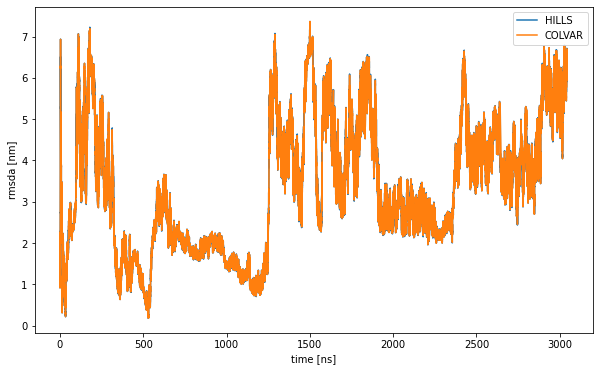

In [35]:
plt.figure(figsize=(10,6))
plt.xlabel("time [ns]")
plt.ylabel("rmsda [nm]")
plt.plot(data_hills["time"]/1000.0,data_hills["rmsda"],label="HILLS")
plt.plot(data_colvar_rew["time"]/1000.0,data_colvar_rew["rmsda"],label="COLVAR")
plt.legend()

In [6]:
data_b=plumed.read_as_pandas("fes_152.dat")
data_r=plumed.read_as_pandas("ffrmsda_reweighted.dat")


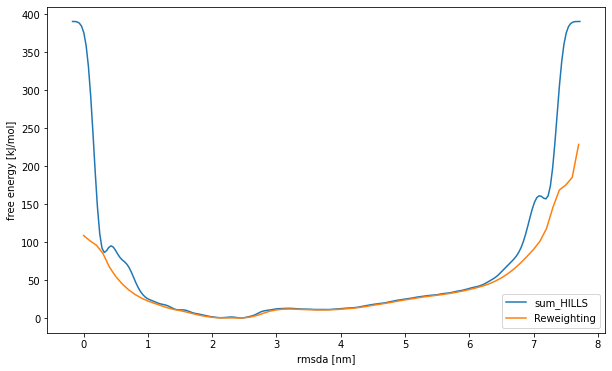

In [37]:
plt.figure(figsize=(10,6))
plt.xlabel("rmsda [nm]")
plt.ylabel("free energy [kJ/mol]")
plt.plot(data_b["rmsda"],data_b["file.free"], label="sum_HILLS")
plt.plot(data_r["rmsda"],data_r["ffrmsda"]-min(data_r["ffrmsda"]),label="Reweighting")
plt.legend()

In [28]:
'''
%%bash
gmx trjcat -f traj_comp_align.xtc -o traj1.0-2.0.xtc -b 1000000 -e 2000000 -dt 10.0
gmx trjcat -f traj_comp_align.xtc -o traj2.0-3.0.xtc -b 2000000 -e 3000000 -dt 10.0
'''

'\n%%bash\ngmx trjcat -f traj_comp_align.xtc -o traj1.0-2.0.xtc -b 1000000 -e 2000000 -dt 10.0\ngmx trjcat -f traj_comp_align.xtc -o traj2.0-3.0.xtc -b 2000000 -e 3000000 -dt 10.0\n'

In [29]:
%%bash
gmx trjcat -f traj_comp_align.xtc -o traj1.0-2.0.xtc -b 1000000 -e 2000000 -dt 10.0
gmx trjcat -f traj_comp_align.xtc -o traj2.0-3.0.xtc -b 2000000 -e 3000000 -dt 10.0

Note that major changes are planned in future for trjcat, to improve usability and utility.
lasttime 0
Note that major changes are planned in future for trjcat, to improve usability and utility.
lasttime 0


               :-) GROMACS - gmx trjcat, 2022.5-plumed_2.9.0 (-:

Executable:   /opt/gromacs-2022.5/bin/gmx_mpi
Data prefix:  /opt/gromacs-2022.5
Working dir:  /hdnas/marcol/tau/polimeri-120/monomer/meta/select-new
Command line:
  gmx trjcat -f traj_comp_align.xtc -o traj1.0-2.0.xtc -b 1000000 -e 2000000 -dt 10.0

Reading frame       1 time   10.000   

Summary of files and start times used:

          File                Start time       Time step
---------------------------------------------------------
      traj_comp_align.xtc        0.000 ps       10.000 ps

Reading frame  100000 time 1000000.000   
Continue writing frames from traj_comp_align.xtc t=1e+06 ps, frame=0      
Reading frame  200000 time 2000000.000    ->  frame 100000 time 2000000.000 ps     
Last frame written was 100000, time 2000000.000000 ps

GROMACS reminds you: "Interfacing Space and Beyond..." (P. J. Harvey)

               :-) GROMACS - gmx trjcat, 2022.5-plumed_2.9.0 (-:

Executable:   /opt/gromacs-2022.5/bin

In [38]:
p=plumed.Plumed()

In [39]:
myhills=plumed.read_as_pandas("HILLS") # first read hills file

In [40]:
plumed.hills_time_average(myhills,"HILLS1.0-2.0",t0=1000000,t1=2000000) # time average between 1000 and 2000 ns

In [41]:
plumed.hills_time_average(myhills,"HILLS2.0-3.0",t0=2000000,t1=3000000) # time average between 2000 and 3000 ns

In [42]:
%%bash
cat > "plumed_rew1.0-2.0.dat" << EOF
rmsda: RMSD REFERENCE=prot_ref_a.pdb TYPE=OPTIMAL

metad: METAD ARG=rmsda ...
PACE=10000000 HEIGHT=0.0 SIGMA=0.1 FILE=HILLS1.0-2.0 GRID_MIN=0.0 GRID_MAX=10.0 BIASFACTOR=16.0 TEMP=310.0
RESTART=YES # <- this is the new stuff!
...

# Use the metadynamics bias as argument
as: REWEIGHT_BIAS ARG=metad.bias
# Calculate histograms of phi and psi dihedrals every 50 steps
# using the weights obtained from the metadynamics bias potentials (umbrella-sampling-like reweighting)
# Look at the manual to understand the parameters of the HISTOGRAM action!
hhrmsda: HISTOGRAM ARG=rmsda STRIDE=1 GRID_MIN=0.0 GRID_MAX=10.0 GRID_BIN=100 BANDWIDTH=0.1 LOGWEIGHTS=as
# Convert histograms h(s) to free energies F(s) = -kBT * log(h(s))
ffrmsda: CONVERT_TO_FES GRID=hhrmsda
# Print out the free energies F(s) to file once the entire trajectory is processed
DUMPGRID GRID=ffrmsda FILE=ffrmsda_reweighted1.0-2.0.dat

PRINT ARG=rmsda,metad.bias FILE=COLVAR_reweighted1.0-2.0 STRIDE=1 # <- also change this one!
EOF

In [43]:
'''
plumed driver --ixtc traj1.0-2.0.xtc --plumed plumed_rew1.0-2.0.dat --kt 2.57748341158 --timestep 10.0
'''

'\nplumed driver --ixtc traj1.0-2.0.xtc --plumed plumed_rew1.0-2.0.dat --kt 2.57748341158 --timestep 10.0\n'

In [44]:
%%bash
plumed driver --ixtc traj1.0-2.0.xtc --plumed plumed_rew1.0-2.0.dat --kt 2.57748341158 --timestep 10.0

PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Jun 18 2023 at 17:13:44
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /opt/plumed-2.9.0/lib/plumed
PLUMED: For installed feature, see /opt/plumed-2.9.0/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1197
PLUMED: File suffix: 
PLUMED: FILE: plumed_rew1.0-2.0.dat
PLUMED: Action RMSD
PLUMED:   with label rmsda
PLUMED:   reference from file prot_ref_a.pdb
PLUMED:   which contains 307 atoms
PLUMED:   with indices : 
PLUMED: 1 5 8 9 10 12 19 20 21 23 35 36 37 39 52 53 54 56 71 72 73 75 87 88 89 
PLUMED: 91 108 109 110 112 130 131 132 136 144 145 146 148 160 161 162 164 172 173 174 176 191 192 193 195 
PLUMED: 202 203 204 206 224 225 226 228 240 

In [45]:
%%bash
cat > "plumed_rew2.0-3.0.dat" << EOF
rmsda: RMSD REFERENCE=prot_ref_a.pdb TYPE=OPTIMAL

metad: METAD ARG=rmsda ...
PACE=10000000 HEIGHT=0.0 SIGMA=0.1 FILE=HILLS2.0-3.0 GRID_MIN=0.0 GRID_MAX=10.0 BIASFACTOR=16.0 TEMP=310.0
RESTART=YES # <- this is the new stuff!
...

# Use the metadynamics bias as argument
as: REWEIGHT_BIAS ARG=metad.bias
# Calculate histograms of phi and psi dihedrals every 50 steps
# using the weights obtained from the metadynamics bias potentials (umbrella-sampling-like reweighting)
# Look at the manual to understand the parameters of the HISTOGRAM action!
hhrmsda: HISTOGRAM ARG=rmsda STRIDE=1 GRID_MIN=0.0 GRID_MAX=10.0 GRID_BIN=100 BANDWIDTH=0.1 LOGWEIGHTS=as
# Convert histograms h(s) to free energies F(s) = -kBT * log(h(s))
ffrmsda: CONVERT_TO_FES GRID=hhrmsda
# Print out the free energies F(s) to file once the entire trajectory is processed
DUMPGRID GRID=ffrmsda FILE=ffrmsda_reweighted2.0-3.0.dat

PRINT ARG=rmsda,metad.bias FILE=COLVAR_reweighted2.0-3.0 STRIDE=1 # <- also change this one!
EOF

In [46]:
'''
plumed driver --ixtc traj2.0-3.0.xtc --plumed plumed_rew2.0-3.0.dat --kt 2.57748341158 --timestep 10.0
'''

'\nplumed driver --ixtc traj2.0-3.0.xtc --plumed plumed_rew2.0-3.0.dat --kt 2.57748341158 --timestep 10.0\n'

In [47]:
%%bash
plumed driver --ixtc traj2.0-3.0.xtc --plumed plumed_rew2.0-3.0.dat --kt 2.57748341158 --timestep 10.0

PLUMED: PLUMED is starting
PLUMED: Version: 2.9.0 (git: Unknown) compiled on Jun 18 2023 at 17:13:44
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /opt/plumed-2.9.0/lib/plumed
PLUMED: For installed feature, see /opt/plumed-2.9.0/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1197
PLUMED: File suffix: 
PLUMED: FILE: plumed_rew2.0-3.0.dat
PLUMED: Action RMSD
PLUMED:   with label rmsda
PLUMED:   reference from file prot_ref_a.pdb
PLUMED:   which contains 307 atoms
PLUMED:   with indices : 
PLUMED: 1 5 8 9 10 12 19 20 21 23 35 36 37 39 52 53 54 56 71 72 73 75 87 88 89 
PLUMED: 91 108 109 110 112 130 131 132 136 144 145 146 148 160 161 162 164 172 173 174 176 191 192 193 195 
PLUMED: 202 203 204 206 224 225 226 228 240 

In [7]:
data_r1_2=plumed.read_as_pandas("ffrmsda_reweighted1.0-2.0.dat")
data_r2_3=plumed.read_as_pandas("ffrmsda_reweighted2.0-3.0.dat")

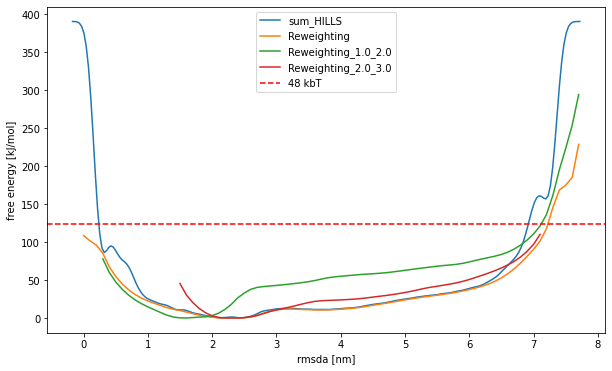

In [8]:
plt.figure(figsize=(10,6))
plt.xlabel("rmsda [nm]")
plt.ylabel("free energy [kJ/mol]")
plt.plot(data_b["rmsda"],data_b["file.free"], label="sum_HILLS")
plt.plot(data_r["rmsda"],data_r["ffrmsda"]-min(data_r["ffrmsda"]),label="Reweighting")
plt.plot(data_r1_2["rmsda"],data_r1_2["ffrmsda"]-min(data_r1_2["ffrmsda"]),label="Reweighting_1.0_2.0")
plt.plot(data_r2_3["rmsda"],data_r2_3["ffrmsda"]-min(data_r2_3["ffrmsda"]),label="Reweighting_2.0_3.0")
plt.axhline(y = 123.36, color = 'r', linestyle = 'dashed', label = "48 kbT")  
#plt.ylim([0, 20])
plt.legend()